# Aditya Mathur

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fb91fe6cc57f4532a658534daff6868f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xu10fdGkmpNXQAVqkU0V1TcDMONJFnJo0BnoArKqkWYN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_fb91fe6cc57f4532a658534daff6868f.get_object(Bucket='frauddetection-donotdelete-pr-kxjtdp8yuouc90',Key='Fraud.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## 1. Data cleaning including missing values, outliers and multi-collinearity.
### How to work with missing data?

####  Steps for working with missing data:

#### 1. Identify missing data
#### 2. Deal with missing data
#### 3. Correct data format

In [4]:
miss_data = df.isnull()

In [5]:
miss_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [6]:
i=0
ll = df["isFlaggedFraud"].values.tolist()

for cls in ll:
  if cls==1:
   i = i+1
 
    
print(i)

16


#### As we can see there are 8213 Fraud cases in given dataset.

In [7]:
for cols in miss_data.columns.values.tolist():
      print(cols)
      print(miss_data[cols].value_counts())

step
False    6362620
Name: step, dtype: int64
type
False    6362620
Name: type, dtype: int64
amount
False    6362620
Name: amount, dtype: int64
nameOrig
False    6362620
Name: nameOrig, dtype: int64
oldbalanceOrg
False    6362620
Name: oldbalanceOrg, dtype: int64
newbalanceOrig
False    6362620
Name: newbalanceOrig, dtype: int64
nameDest
False    6362620
Name: nameDest, dtype: int64
oldbalanceDest
False    6362620
Name: oldbalanceDest, dtype: int64
newbalanceDest
False    6362620
Name: newbalanceDest, dtype: int64
isFraud
False    6362620
Name: isFraud, dtype: int64
isFlaggedFraud
False    6362620
Name: isFlaggedFraud, dtype: int64


### As we can see, there are no missing values in the above data set since isnull() fun. returns "true" if missing value present but in above result we have 6362620 false results in every feature which is equal to number of rows so there are no missing values in the dataset.

### For finding outlier, data Visualisation can be a good aproach , so we try to plot the given dataset.

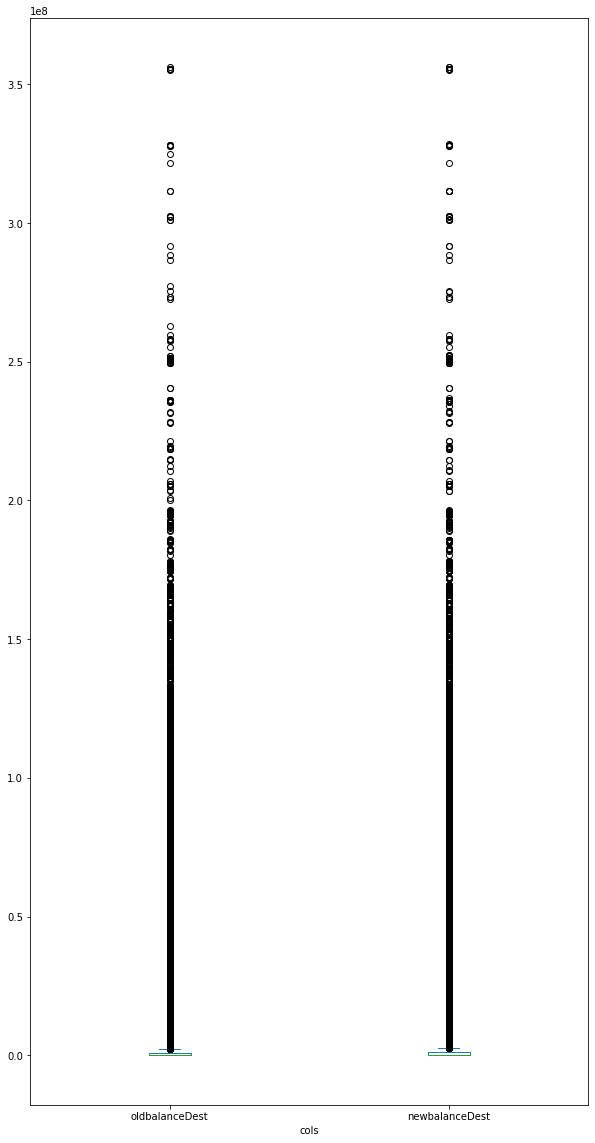

In [8]:
## Before removing Outliers
df[['oldbalanceDest','newbalanceDest']].plot(kind='box' , figsize=(10, 20))
plt.xlabel('cols')
plt.show()

### As we can see there are outliers in every feature that we considered for predicting our target variable ("isFraud"). Let's remove them 

In [9]:
out_oldB = df.sort_values("oldbalanceDest",ascending=False).head(20).index ## out_oldB = outliers in oldbalanceDest

In [10]:
 df.drop(labels=out_oldB, axis=0 , inplace = True)  ## droping the outliers 

In [11]:
df.shape

(6362600, 11)

In [12]:
out_newB = df.sort_values('newbalanceDest',ascending=False).head(20).index ## out_newB = outliers in newbalanceDest

In [13]:
 df.drop(labels=out_newB, axis=0 , inplace = True)  ## droping the outliers 

In [14]:
df.shape

(6362580, 11)

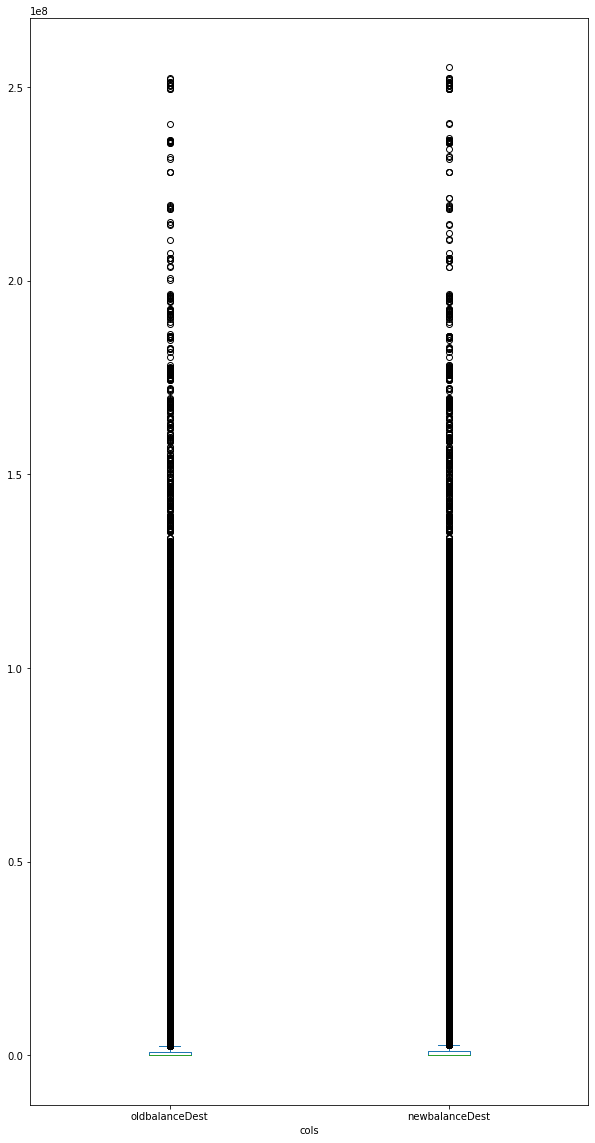

In [15]:
## After removing Outliers


df[['oldbalanceDest','newbalanceDest']].plot(kind='box' , figsize=(10, 20))
plt.xlabel('cols')
plt.show()

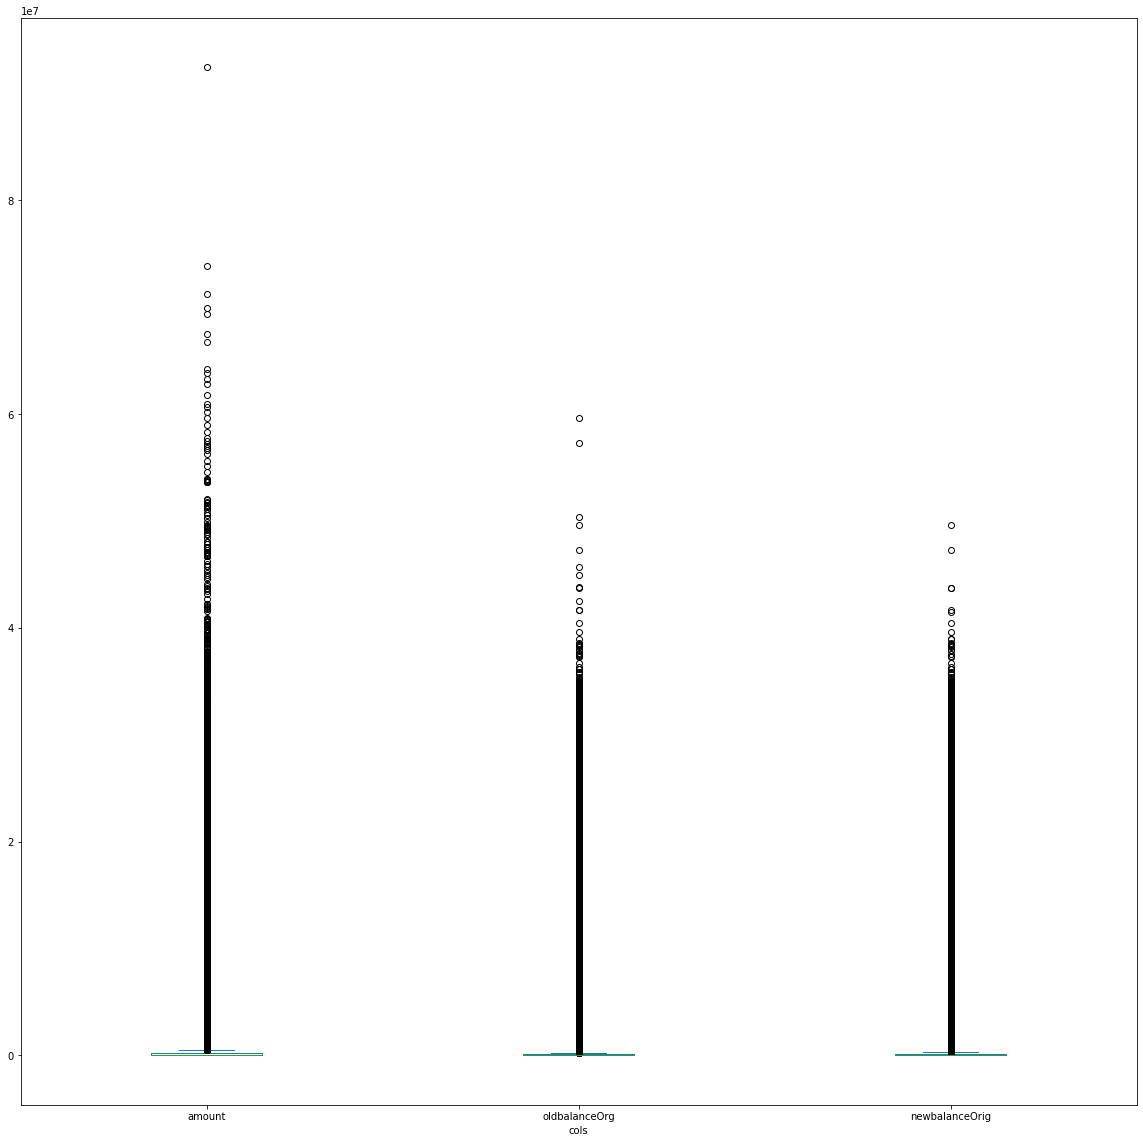

In [16]:
# Before removing outlier

df[['amount','oldbalanceOrg','newbalanceOrig']].plot(kind='box' , figsize=(20, 20))
plt.xlabel('cols')
plt.show()

In [17]:
out_amount = df.sort_values('amount',ascending=False).head(7).index ## out_amount = outliers in amount

In [18]:
 df.drop(labels=out_amount, axis=0 , inplace = True)  ## droping the outliers 

In [ ]:
out_oldB_org = df.sort_values('oldbalanceOrg',ascending=False).head(5).index ## out_lodB_org = outliers in 'oldbalanceOrg'
df.drop(labels=out_oldB_org  , axis=0 , inplace = True)  ## droping the outliers 

In [22]:
out_oldB_org = df.sort_values('oldbalanceOrg',ascending=False).head(2).index ## out_lodB_org = outliers in 'oldbalanceOrg'
df.drop(labels=out_oldB_org  , axis=0 , inplace = True)  ## droping the outliers 

In [20]:
out_newB_org = df.sort_values('newbalanceOrig',ascending=False).head(5).index ## out_newB_org = outliers in 'newbalanceOrig'
df.drop(labels=out_newB_org  , axis=0 , inplace = True)  ## droping the outliers 

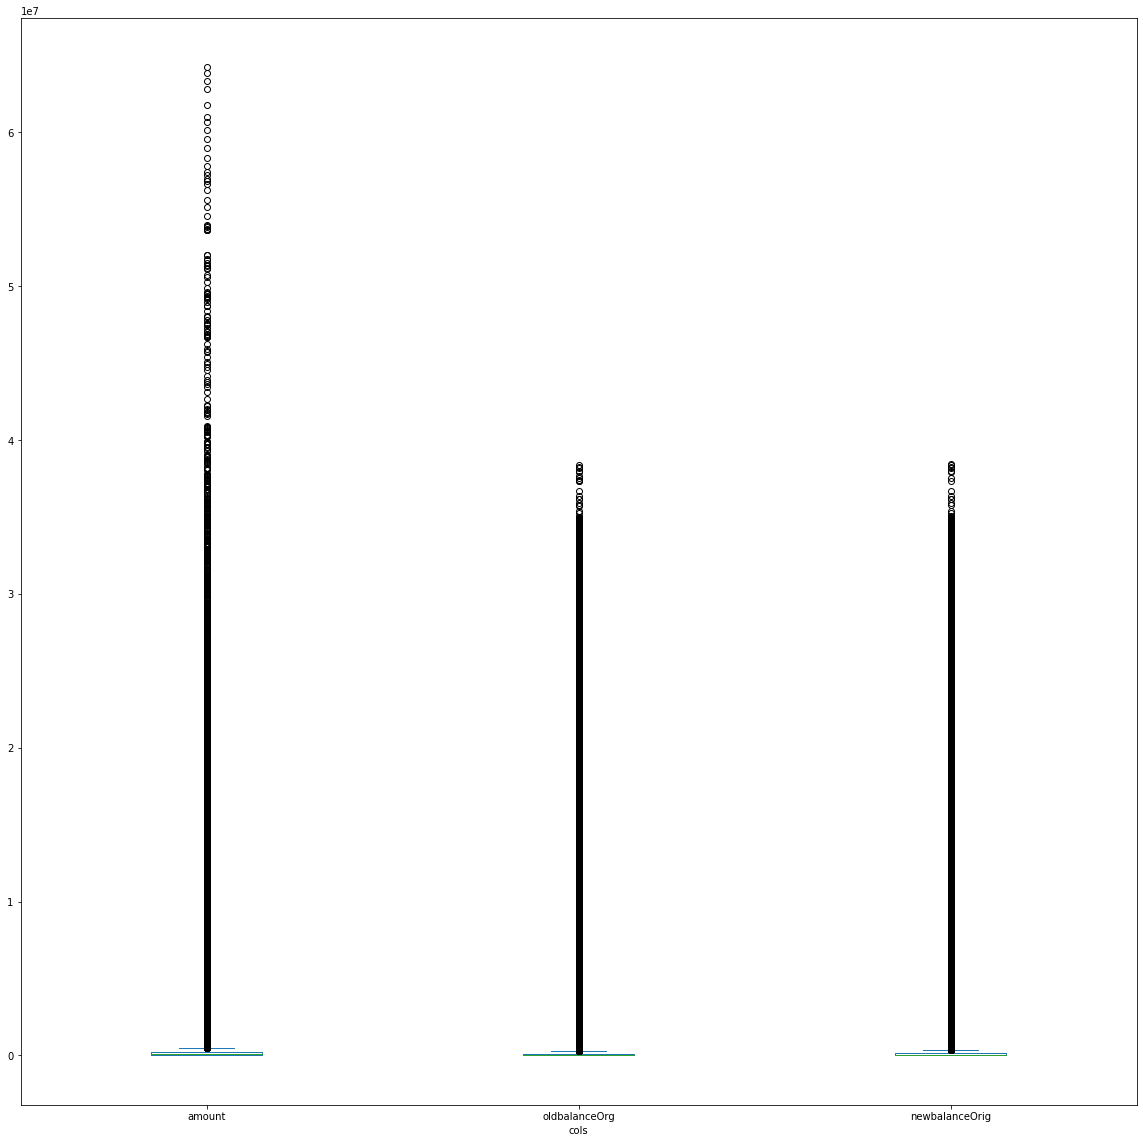

In [23]:
# After removing outlier


df[['amount','oldbalanceOrg','newbalanceOrig']].plot(kind='box' , figsize=(20, 20))
plt.xlabel('cols')
plt.show()

### Since we have one categorical independent variable in our dataset i.e "type" and it is important to check whether different class of transaction has a impact on detecting a Fraud transaction or not, so we will modify our dataset by concating the columns as 'CASH_IN','CASH_OUT','DEBIT', 'PAYMENT','TRANSFER'.

In [24]:
df['type'].value_counts()

CASH_OUT    2237484
PAYMENT     2151493
CASH_IN     1399276
TRANSFER     532872
DEBIT         41431
Name: type, dtype: int64

In [25]:
dummy_variable_1 = pd.get_dummies(df['type'])
dummy_variable_1

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [27]:
df = pd.concat([df, dummy_variable_1], axis=1)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,...,0,0,0,1,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,...,0,0,0,1,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,...,0,0,0,0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,...,0,1,0,0,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,...,0,1,0,0,0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,...,0,0,0,0,1,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,...,0,1,0,0,0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,...,0,0,0,0,1,0,0,0,0,1


## 3. How did you select variables to be included in the model?
#### We can first check how the features of the given dataset is correlated to our target variable. We can use Pearson correlation coefficient to check which features has more influence for predicting the target variable('isFraud')

In [28]:
df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT','isFraud']].corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step,CASH_OUT,CASH_OUT,PAYMENT,PAYMENT,CASH_IN,CASH_IN,TRANSFER,TRANSFER,DEBIT,DEBIT,isFraud
amount,1.000000,-0.003144,-0.008206,0.293122,0.460761,0.022477,-0.004230,-0.004230,-0.199475,-0.199475,-0.009588,-0.009588,0.369145,0.369145,-0.023620,-0.023620,0.076888
oldbalanceOrg,-0.003144,1.000000,0.998812,0.067985,0.043137,-0.010115,-0.200943,-0.200943,-0.189528,-0.189528,0.506929,0.506929,-0.081697,-0.081697,-0.021453,-0.021453,0.009454
newbalanceOrig,-0.008206,0.998812,1.000000,0.069585,0.042935,-0.010342,-0.211011,-0.211011,-0.193946,-0.193946,0.527500,0.527500,-0.087435,-0.087435,-0.021874,-0.021874,-0.008706
oldbalanceDest,0.293122,0.067985,0.069585,1.000000,0.975785,0.027920,0.088151,0.088151,-0.236741,-0.236741,0.078102,0.078102,0.132838,0.132838,0.009431,0.009431,-0.005999
newbalanceDest,0.460761,0.043137,0.042935,0.975785,1.000000,0.026091,0.095732,0.095732,-0.243551,-0.243551,0.035957,0.035957,0.195307,0.195307,0.006366,0.006366,0.000584
step,0.022477,-0.010115,-0.010342,0.027920,0.026091,1.000000,-0.012917,-0.012917,0.004932,0.004932,0.004081,0.004081,0.006908,0.006908,0.002868,0.002868,0.031495
CASH_OUT,-0.004230,-0.200943,-0.211011,0.088151,0.095732,-0.012917,1.000000,1.000000,-0.526427,-0.526427,-0.391049,-0.391049,-0.222666,-0.222666,-0.059625,-0.059625,0.011295
CASH_OUT,-0.004230,-0.200943,-0.211011,0.088151,0.095732,-0.012917,1.000000,1.000000,-0.526427,-0.526427,-0.391049,-0.391049,-0.222666,-0.222666,-0.059625,-0.059625,0.011295
PAYMENT,-0.199475,-0.189528,-0.193946,-0.236741,-0.243551,0.004932,-0.526427,-0.526427,1.000000,1.000000,-0.379526,-0.379526,-0.216104,-0.216104,-0.057868,-0.057868,-0.025682
PAYMENT,-0.199475,-0.189528,-0.193946,-0.236741,-0.243551,0.004932,-0.526427,-0.526427,1.000000,1.000000,-0.379526,-0.379526,-0.216104,-0.216104,-0.057868,-0.057868,-0.025682


#### Next , we will check the P-Values of features. The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

In [63]:
cls = ['amount' , 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT']


In [64]:
from scipy import stats

In [ ]:
ll = []
temp = []
for cols in cls:
    
    pearson_coef, p_value = stats.pearsonr(df[cols], df['isFraud'])
    temp = [cols, p_value]
    ll.append(temp)

ll

### Now on the basis of P-Values and Pearson correlation coefficient we can say that the Features that we have selected have more influence on the Target Variable.

## 2. Describe your fraud detection model in elaboration.
#### We can use different ML algorithms such as Logitic Regression ,Support Vector Machine, Discision Trees , XgBoost . In our case Classification ML Models are more likely to be use as we have our target variable "isFraud" which is a binary Categorical Variable so we will try some of Classification Algorithm and on the basis of accuracy of our ML Model we will select  Final Model for Fraud Transaction Detection.



## (i). Logistic Regression

In [35]:
import scipy.optimize as opt
from sklearn import preprocessing
import pylab as pl

from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score






In [36]:

X1 = np.asarray(df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT']])


In [37]:
Y1 = np.asarray(df['isFraud'])
Y1

array([0, 0, 1, ..., 1, 1, 1])

In [38]:
X1 = pre.StandardScaler().fit(X1).transform(X1) ## Normalising the Data
X1

array([[-2.84460325e-01, -2.29842667e-01, -2.37642471e-01, ...,
        -3.02335360e-01, -8.09590715e-02, -8.09590715e-02],
       [-2.97816172e-01, -2.81408189e-01, -2.85844100e-01, ...,
        -3.02335360e-01, -8.09590715e-02, -8.09590715e-02],
       [-3.00635057e-01, -2.88704880e-01, -2.92475028e-01, ...,
         3.30758533e+00, -8.09590715e-02, -8.09590715e-02],
       ...,
       [ 1.02683922e+01,  1.89712586e+00, -2.92475028e-01, ...,
        -3.02335360e-01, -8.09590715e-02, -8.09590715e-02],
       [ 1.12250896e+00,  5.62229612e-03, -2.92475028e-01, ...,
         3.30758533e+00, -8.09590715e-02, -8.09590715e-02],
       [ 1.12250896e+00,  5.62229612e-03, -2.92475028e-01, ...,
        -3.02335360e-01, -8.09590715e-02, -8.09590715e-02]])

In [39]:
x1_train , x1_test , y1_train , y1_test = tts(X1 , Y1 , test_size = 0.2 , random_state=5)



In [40]:
LR1 = lr(C=0.01 , solver = 'liblinear')
LR1 = LR1.fit(x1_train , y1_train)
LR1

LogisticRegression(C=0.01, solver='liblinear')

In [41]:
y1_hat = LR1.predict(x1_test)
y1_hat

array([0, 0, 0, ..., 0, 0, 0])

## 4. Demonstrate the performance of the model by using best set of tools.
#### For testing our Model we will use the test dataset. There are various methods to check the Accuracy such as Jaccard Index , Log Loss , MSE(Mean Square Erroe) , R Square value etc. 

In [42]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

In [43]:

one=0
zero =0
temp =0
for i in y1_hat:
    if i==1:
     temp =temp+1
    if i==0:
     zero = zero+1
     
    
print("one: ",temp)
print("zero: ",zero)

one:  297
zero:  1272215


In [44]:
js1 = jaccard_score(y1_test , y1_hat , pos_label=0)

print('jaccard_score' , js1)

jaccard_score 0.9989262838022129


In [66]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y1_test, y1_hat)))



Accuracy score of the Logistic Regression model is 0.9989265327163909


In [46]:
print (classification_report(y1_test, y1_hat))

log_loss(y1_test, y1_hat)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270853
           1       0.99      0.18      0.30      1659

    accuracy                           1.00   1272512
   macro avg       1.00      0.59      0.65   1272512
weighted avg       1.00      1.00      1.00   1272512



0.03707624773255118

#### As we can see the value of Jaccard score is close to 1 which indicates the Good Accuracy of our Model on the test dataset ,And the value Log of loss is also very small. Hence, Logistic Regression Model can be a good choice for Fraud Transaction detection.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
#from xgboost import XGBClassifier



## (ii).DecisionTree

In [49]:
dt = DecisionTreeClassifier(max_depth =4 , criterion = 'entropy')
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [50]:
dt.fit(x1_train , y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [51]:
dt_hat = dt.predict(x1_test)
dt_hat

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
js2 = jaccard_score(y1_test , dt_hat , pos_label=0)
js2

0.9994565482397982

In [53]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y1_test, dt_hat)))


Accuracy score of the Decision Tree model is 0.9994569795805462


In [54]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y1_test, dt_hat)))

F1 score of the Decision Tree model is 0.7451125046108447


In [55]:
print (classification_report(y1_test, dt_hat))

log_loss(y1_test, dt_hat)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270853
           1       0.96      0.61      0.75      1659

    accuracy                           1.00   1272512
   macro avg       0.98      0.80      0.87   1272512
weighted avg       1.00      1.00      1.00   1272512



0.01875528723656566

### As we can see, DecisionTree Model is better than Logistic Regression Model in terms of Accuracy and F1- score (harmonic mean of the precision and recall of a classifier). so finally we can select DecisionTree Model.

## 5. What are the key factors that predict fraudulent customer?

#### The past Transactions details.
#### Customer's identity (such as email addresses, credit card numbers, etc.)
#### The locations they have used for the transactions.
####  payment methods
#### Their Neighbourhood (phone numbers, emails, and payment details entered with the online account).

## 6. Do these factors make sense? If yes, How? If not, How not?
#### Yes, these Methods Make Sense 
#### The past Transactions details : On the basis of these details we can check the anomalies in transactions.
#### Customer's identity (such as email addresses, credit card numbers, etc.) : These are the Details that helps to Identify the Person who did the Fraud Transaction.
#### The locations they have used for the transactions : Location play a key role to find out the user of Fraud Transaction and then we can Investigate accordingly.
#### Payment methods : This factor can help to know the exact mode of transaction and suppose if we don't have the identiity of the user and transaction done by an Online mode then we can get the details from its payment ID and we can also contact to the Registered Bank.




## 7. What kind of prevention should be adopted while company update its infrastructure?
#### Preventions like Increase Security of DataBases as it contains important details of users , company should inform the users that if they recieve any kind of mails or messges regarding Transacions during the period of changing Infrastructure they must inform the company about it so that they can be safe from any kind of loss with their Bank amount, And If possible company should make a copy of important details of users as it might get lost due to some technical glitch and this can be done by using Cloud services.

## 8. Assuming these actions have been implemented, how would you determine if they work?
#### After the change of Infrastructure, we can check the details of the users from the DataBase if all the things goes fine then we can say there is no trouble and Also we can mail or message to our users regarding any fault in their bank balance? .